# Hall effect

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd

## Calibration magnetic field

Calibration of magnetic sensor is: 0.1172 T/mV at 10 mA

In [2]:
I = np.arange(0,16)
V = np.array([0.060,0.405,0.743,1.098,1.437,1.775,2.100,2.432,2.766,3.080,3.419,3.739,4.051,4.374,4.682,4.977])
c = 0.1172
B = V[13] * c

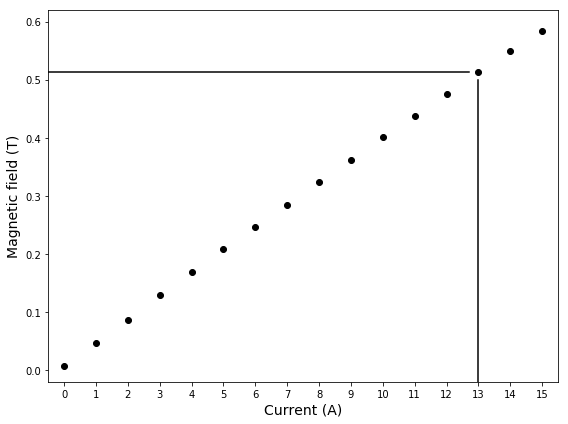

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(I, c*V, 'ko')
ax.plot([-1,12.7], [B, B], 'k-')
ax.plot([13,13], [-1, .5], 'k-')
ax.set_xlabel('Current (A)', fontsize=14)
ax.set_ylabel('Magnetic field (T)', fontsize=14)
ax.set_xticks(np.arange(0, 16, step=1))
ax.set_xbound(-.5,15.5)
ax.set_ybound(-.02,.62)
plt.tight_layout()

## Check Ohmic behaviour

In [4]:
I = np.arange(10,160,10)
V = np.array([40.7,81.1,122.2,162.7,202.9,243.2,283.6,324.7,365.1,405.3,445.5,485.8,527.0,567.3,607.5])
slope, intercept, r_value, p_value, std_err = stats.linregress(I, V)
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

4.048107142857143
0.4580952380952681
0.99999885689099
4.6869276251004674e-38
0.001697616221964907


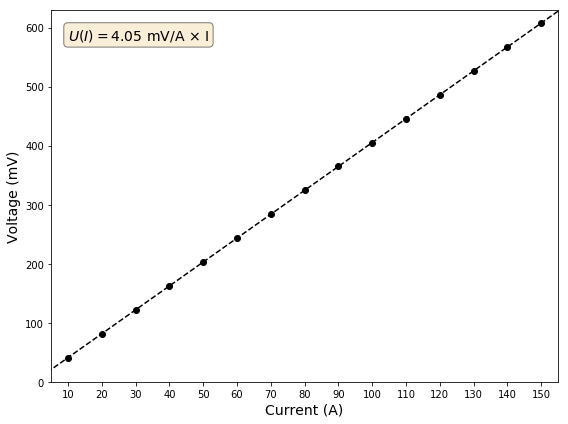

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(I, V, 'ko')
x = np.linspace(0,160)
y = x*slope + intercept
ax.plot(x,y,'k--')
ax.set_xlabel('Current (A)', fontsize=14)
ax.set_ylabel('Voltage (mV)', fontsize=14)
ax.set_xbound(5,155)
ax.set_ybound(0,630)
ax.set_xticks(np.arange(10,160,10))
ax.text(10,580, r"$U(I)={:.2f}$ mV/A $\times$ I".format(slope), fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()

## Orientation of the sample

In [6]:
angle = np.arange(-90,100,10)
V = np.array([-9.22,-9.01,-8.82,-8.63,-8.45,-8.3,-8.17,-8.07,-8.01,-7.98,-7.98,-8.02,-8.10,-8.21,-8.35,-8.52,-8.7,-8.89,-9.09])

In [7]:
def fit_fun(angle, u0, u_offset, phi):
    return u0 * np.cos(angle + phi) + u_offset

In [8]:
popt, pcov = curve_fit(fit_fun, np.deg2rad(angle), V)

In [9]:
print(popt)
print(pcov)

[ 1.18225737 -9.15857643 -0.05483522]
[[ 1.03952611e-05 -6.25900777e-06  3.79884981e-07]
 [-6.25900777e-06  4.93574913e-06 -2.90595913e-07]
 [ 3.79884981e-07 -2.90595913e-07  1.60096857e-06]]


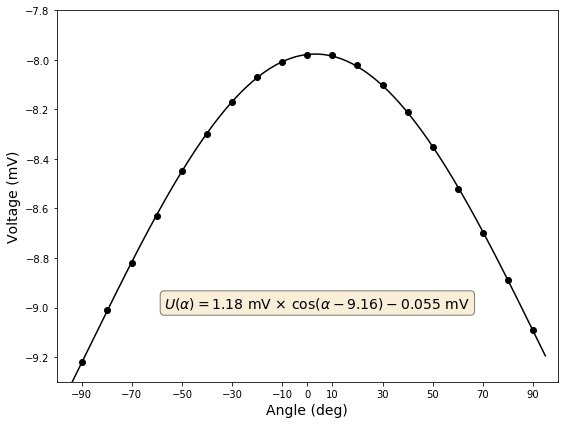

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(angle, V, 'ko')
x = np.deg2rad(np.arange(-95,95,.1))
y = fit_fun(x, *popt)
ax.plot(np.rad2deg(x), y, 'k-')
#ax.plot([5,5], [-12,-7.97], 'k-')
ax.set_xlabel('Angle (deg)', fontsize=14)
ax.set_ylabel('Voltage (mV)', fontsize=14)
ax.set_xbound(-100,100)
ax.set_ybound(-9.3,-7.8)
ax.set_xticks([-90,-70,-50,-30,-10,0,10,30,50,70,90])
ax.text(-57,-9, r"$U(\alpha)={:.2f}$ mV $\times$ $\cos(\alpha {:.2f}) {:.3f}$ mV".format(*popt),
        fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()

## Dataset preparation

In [101]:
data = np.loadtxt('measurements.txt', comments='#')
T = data[:, 0]
U_Hall = data[:, 2] - data[:, 1]
R_mn_op = data[:, 3] / .1
R_no_pm = data[:, 4] / .1

Data from other group

In [47]:
data2 = pd.read_excel('Data_Lettner_Schuele.xlsx', header=None,
                       names=['Temperature', 'Hall_Total_Voltage', 'Hall_Offset_Voltage', 'Voltage_OP', 'Voltage_PM'],
                       usecols='B:F', dtype=np.float32, skiprows=6)

In [48]:
data2.head()

,Temperature,Hall_Total_Voltage,Hall_Offset_Voltage,Voltage_OP,Voltage_PM
0,82.199997,65.500000,86.900002,-159.600006,-245.199997
1,87.300003,48.799999,56.200001,-107.000000,-163.000000
2,96.000000,36.000000,42.000000,-84.000000,-127.000000
3,102.400002,29.700001,34.700001,-67.000000,-102.000000
4,109.000000,25.100000,29.400000,-58.000000,-87.000000


Plots of both our data and other group's data

In [77]:
T2 = data2['Temperature'].values
U_Hall2 = (data2['Hall_Total_Voltage'] - data2['Hall_Offset_Voltage']).values
R_mn_op2 = (data2['Voltage_OP'] / .1).values
R_no_pm2 = (data2['Voltage_PM'] / .1).values

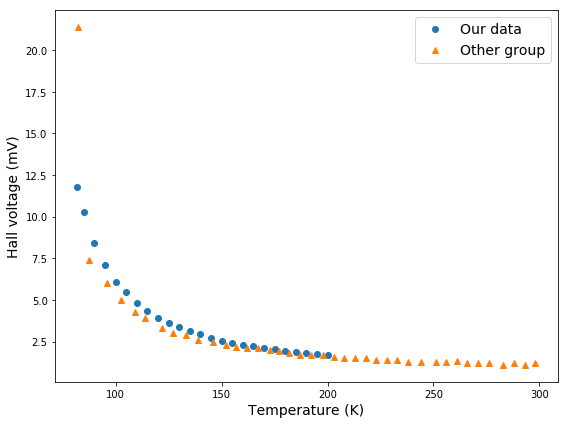

In [81]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T, U_Hall, 'o', label='Our data')
ax.plot(T2, -U_Hall2, '^', label='Other group')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('Hall voltage (mV)', fontsize=14)
ax.legend(loc=0, fontsize=14)
plt.tight_layout()

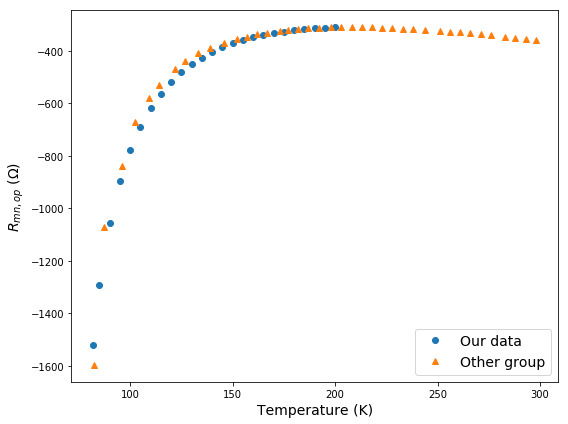

In [85]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T, R_mn_op, 'o', label='Our data')
ax.plot(T2, R_mn_op2, '^', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

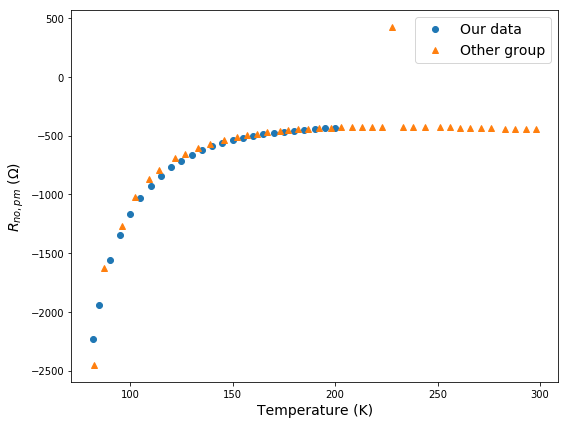

In [87]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T, R_no_pm, 'o', label='Our data')
ax.plot(T2, R_no_pm2, '^', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

Combined data from our measurements and the other group

In [79]:
cut = 21

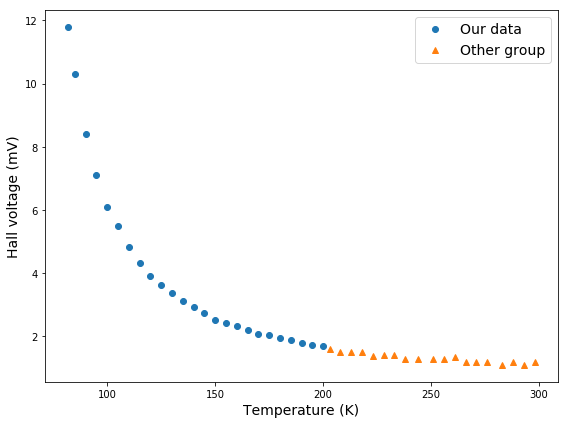

In [84]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T, U_Hall, 'o', label='Our data')
ax.plot(T2[cut:], -U_Hall2[cut:], '^', label='Other group')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('Hall voltage (mV)', fontsize=14)
ax.legend(loc=0, fontsize=14)
plt.tight_layout()

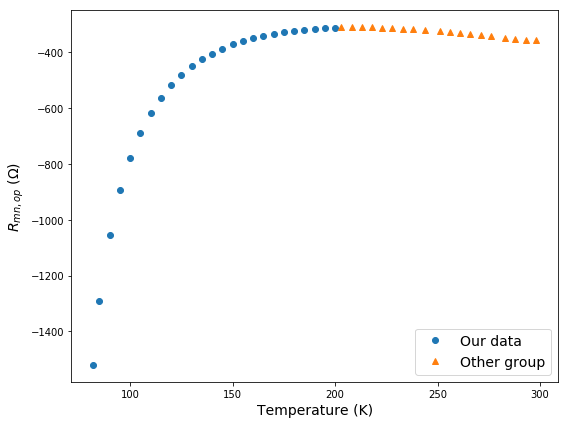

In [83]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T, R_mn_op, 'o', label='Our data')
ax.plot(T2[cut:], R_mn_op2[cut:], '^', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

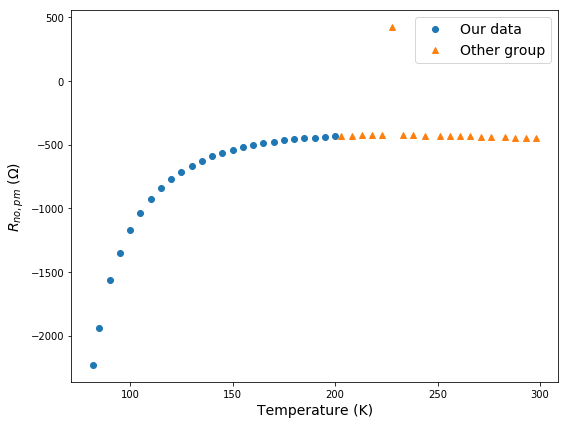

In [86]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T, R_no_pm, 'o', label='Our data')
ax.plot(T2[cut:], R_no_pm2[cut:], '^', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

In [90]:
T3 = np.concatenate((T, T2[cut:]))
U_Hall3 = np.concatenate((U_Hall, -U_Hall2[cut:]))
R_mn_op3 = np.concatenate((R_mn_op, R_mn_op2[cut:]))
R_no_pm3 = np.concatenate((R_no_pm, R_no_pm2[cut:]))

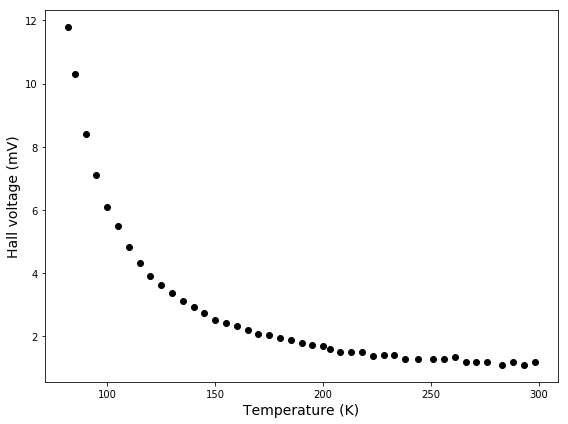

In [92]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, U_Hall3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('Hall voltage (mV)', fontsize=14)
plt.tight_layout()

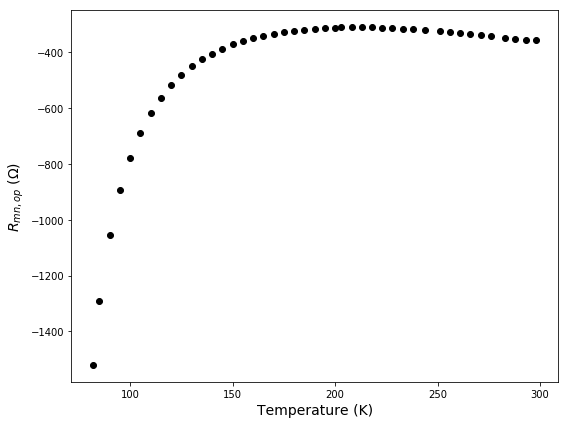

In [93]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_mn_op3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

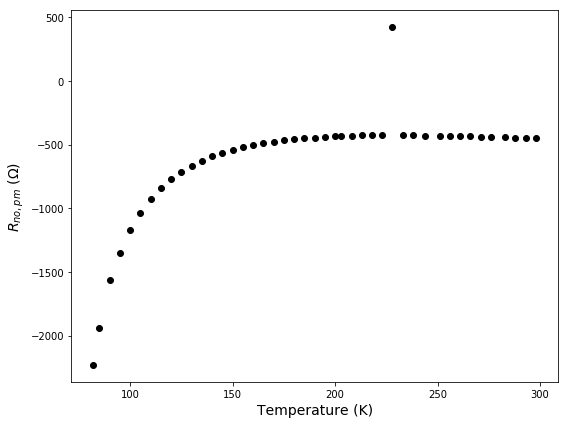

In [94]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_no_pm3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
plt.tight_layout()

In [ ]:
T3 = np.concatenate((T, T2[cut:]))
U_Hall3 = np.concatenate((U_Hall, -U_Hall2[cut:]))
R_mn_op3 = np.concatenate((R_mn_op, R_mn_op2[cut:]))
R_no_pm3

In [97]:
data3 = pd.DataFrame(data={'Temperature':T3, 'Hall_Voltage':U_Hall3, 'R_mn_op':R_mn_op3, 'R_no_pm':R_no_pm3})

In [98]:
data3.head()

,Temperature,Hall_Voltage,R_mn_op,R_no_pm
0,82.0,11.8,-1520.0,-2230.0
1,85.0,10.3,-1290.0,-1940.0
2,90.0,8.4,-1056.0,-1560.0
3,95.0,7.1,-895.1,-1350.0
4,100.0,6.1,-777.5,-1171.0


In [100]:
data3.to_csv('Combined_dataset.csv')
data3.to_excel('Combined_dataset.xlsx')

## Determination of $p$ and $\mu$

In [138]:
d = 3.1e-3 # cm
I0 = 0.1e-3 # A
m_dh = 0.689 * cte.electron_mass

In [139]:
R_H = U_Hall3 * d / (B * I0)

In [140]:
p = 1 / (cte.elementary_charge * R_H)

In [141]:
p

array([8.74686249e+15, 1.00206774e+16, 1.22872592e+16, 1.45370391e+16,
       1.69201602e+16, 1.88344849e+16, 2.13691465e+16, 2.37817920e+16,
       2.63971809e+16, 2.85118722e+16, 3.07181480e+16, 3.30810825e+16,
       3.52262722e+16, 3.78069514e+16, 4.07956432e+16, 4.23524733e+16,
       4.44308986e+16, 4.65972810e+16, 4.93605822e+16, 5.06442480e+16,
       5.26596823e+16, 5.46389505e+16, 5.74043256e+16, 5.96951865e+16,
       6.03231896e+16, 6.45080955e+16, 6.88086516e+16, 6.88086516e+16,
       6.88086516e+16, 7.47920064e+16, 7.37235252e+16, 7.37235754e+16,
       7.93945864e+16, 7.93945864e+16, 7.93946446e+16, 7.93945864e+16,
       7.70246012e+16, 8.60107598e+16, 8.60108282e+16, 8.60107598e+16,
       9.38299469e+16, 8.60108282e+16, 9.38300283e+16, 8.60108282e+16])

In [168]:
def p_doping(T, Na, Ea):
    return 2 * Na / (1 + np.sqrt(1 + 16 * Na / Nv(T) * np.exp(Ea / (cte.Boltzmann * T))))

def Nv(T):
    return 2 * (2 * np.pi * m_dh * cte.Boltzmann * T / (cte.Planck)**2)**(3/2)

In [181]:
Nv(T)

array([2.05087657e+24, 2.16444789e+24, 2.35821018e+24, 2.55743234e+24,
       2.76196865e+24, 2.97168446e+24, 3.18645488e+24, 3.40616362e+24,
       3.63070208e+24, 3.85996854e+24, 4.09386742e+24, 4.33230873e+24,
       4.57520753e+24, 4.82248348e+24, 5.07406041e+24, 5.32986603e+24,
       5.58983153e+24, 5.85389140e+24, 6.12198311e+24, 6.39404691e+24,
       6.67002563e+24, 6.94986451e+24, 7.23351101e+24, 7.52091469e+24,
       7.81202706e+24])

In [228]:
popt, pcov = curve_fit(p_doping, T3, p, p0=(7.3e16, 3e-20))
print(popt)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[7.34714354e+16 3.48376309e-20]
[[7.00365734e+30 7.13391210e-07]
 [7.13391210e-07 7.86873924e-43]]
[2.64644239e+15 8.87059143e-22]


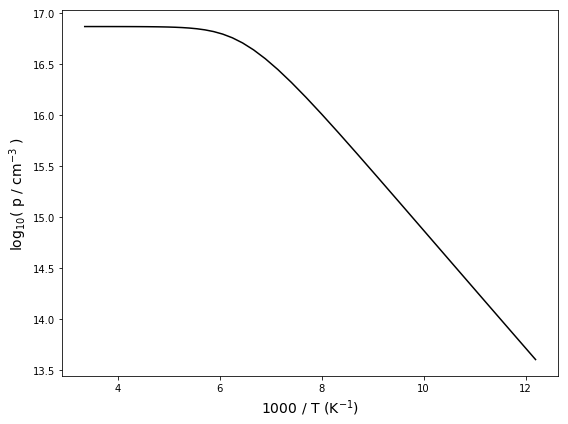

In [230]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, np.log10(p_doping(T3, *popt)), 'k-')
ax.set_xlabel('1000 / T (K$^{-1}$)', fontsize=14)
ax.set_ylabel('$\log_{10}($ p / cm$^{-3}$ )', fontsize=14)
plt.tight_layout()

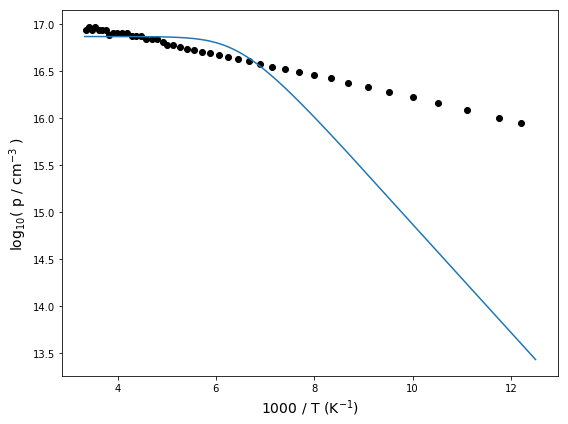

In [231]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, np.log10(p), 'ko')
T = np.linspace(80,300,1000)
ax.plot(1000/T, np.log10(p_doping(T, *popt)))
ax.set_xlabel('1000 / T (K$^{-1}$)', fontsize=14)
ax.set_ylabel('$\log_{10}($ p / cm$^{-3}$ )', fontsize=14)
plt.tight_layout()

In [17]:
def vdP(R, rho):
    return np.exp(-np.pi * R[0] * d / rho) + np.exp(-np.pi * R[1] * d / rho)

In [18]:
popt, pcov = curve_fit(vdP, [R_mn_op, R_no_pm], np.ones(len(R_mn_op)))

In [19]:
popt

array([1.62814301e+08])

In [20]:
np.exp(-np.pi * R_mn_op * d / popt[0]) + np.exp(-np.pi * R_no_pm * d / popt[0])

array([2.00000002, 2.00000002, 2.00000002, 2.00000001, 2.00000001,
       2.00000001, 2.00000001, 2.00000001, 2.00000001, 2.00000001,
       2.00000001, 2.00000001, 2.00000001, 2.00000001, 2.00000001,
       2.00000001, 2.00000001, 2.        , 2.        , 2.        ,
       2.        , 2.        , 2.        , 2.        , 2.        ])